In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


<font color='SteelBlue'>
    
# **INTRODUCTION:**

<font color='black'>

   #### The dataset is from 2020 annual CDC survey data of 400k adults related to their health status.
    
    For more: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

<a id="34"></a>


<font color='purple'>
      
      
# Content:
1. [LOAD and FIRST LOOK to DATA](#1)
1. [VARIABLE DESCRIPTION](#2)
1. [MISSING VALUES](#3)
    * [Find Missing Value](#4)
    * [Fill Missing Value](#5)

1. [UNIVARIATE VARIABLE ANALYSIS](#6)
      * [Categorical Variable](#7)
      * [Numerical Variable](#8)
1. [BASIC DATA ANALYSIS](#9)
      * [Converting to Ordinal Variable](#10)
      * [HeartDisease-BMI](#11)
      * [HeartDisease-SleepTime](#12)
      * [Sex-MentalHealth](#13)
      * [AgeCategory-MentalHealth](#14)
1. [OUTLIER DETECTION](#15)
      * [Calculation of Interquartile Range](#16)
      * [Finding Outlier Values](#17)
      * [Solutions for Outlier Values](#18)
          * [Trimming](#19)
          * [Imputation](#20)
          * [Winsorization](#21)
1. [VISUALIZATION](#22)
      * [Correlation Between BMI-PhysicalHealth-MentalHealth-SleepTime](#23)
      * [AGE](#24)
      * [BMI](#25)
      * [SMOKING](#26)
      * [ALCOHOL](#27)
1. [MODELLING](#28)
      * [PREPROCESSING](#29)
      * [NORMALIZATION](#30)
      * [TRAIN-TEST SPLIT](#31)
      * [MODELS](#32)
      * [ROC - AUC CURVE](#33)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id="1"></a>

<font color='Violet'>
    
# LOAD and FIRST LOOK to DATA

In [3]:
data=pd.read_csv("../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")

In [4]:
df=data.copy() # Copy to original dataset for protection

In [5]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [6]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [7]:
df.shape

(319795, 18)

Data Set have 18 columns & 319795 rows

In [8]:
# What is columns names?
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

#### Describe function ignores missing values and leaves out Categorical variables.

In [9]:
df.describe().T

count       mean       std    min    25%    50%    75%  \
BMI             319795.0  28.325399  6.356100  12.02  24.03  27.34  31.42   
PhysicalHealth  319795.0   3.371710  7.950850   0.00   0.00   0.00   2.00   
MentalHealth    319795.0   3.898366  7.955235   0.00   0.00   0.00   3.00   
SleepTime       319795.0   7.097075  1.436007   1.00   6.00   7.00   8.00   

                  max  
BMI             94.85  
PhysicalHealth  30.00  
MentalHealth    30.00  
SleepTime       24.00

#### To include categorical variables:

In [10]:
df.describe(include="all").T

count unique        top    freq       mean       std  \
HeartDisease        319795      2         No  292422        NaN       NaN   
BMI               319795.0    NaN        NaN     NaN  28.325399    6.3561   
Smoking             319795      2         No  187887        NaN       NaN   
AlcoholDrinking     319795      2         No  298018        NaN       NaN   
Stroke              319795      2         No  307726        NaN       NaN   
PhysicalHealth    319795.0    NaN        NaN     NaN    3.37171   7.95085   
MentalHealth      319795.0    NaN        NaN     NaN   3.898366  7.955235   
DiffWalking         319795      2         No  275385        NaN       NaN   
Sex                 319795      2     Female  167805        NaN       NaN   
AgeCategory         319795     13      65-69   34151        NaN       NaN   
Race                319795      6      White  245212        NaN       NaN   
Diabetic            319795      4         No  269653        NaN       NaN   
PhysicalActivity    319795      2        Yes  247957        NaN       NaN   
GenHealth           319795      5  Very good  113858        NaN       NaN   
SleepTime         319795.0    NaN        NaN     NaN   7.097075  1.436007   
Asthma              319795      2         No  276923        NaN       NaN   
KidneyDisease       319795      2         No  308016        NaN       NaN   
SkinCancer          319795      2         No  289976        NaN       NaN   

                    min    25%    50%    75%    max  
HeartDisease        NaN    NaN    NaN    NaN    NaN  
BMI               12.02  24.03  27.34  31.42  94.85  
Smoking             NaN    NaN    NaN    NaN    NaN  
AlcoholDrinking     NaN    NaN    NaN    NaN    NaN  
Stroke              NaN    NaN    NaN    NaN    NaN  
PhysicalHealth      0.0    0.0    0.0    2.0   30.0  
MentalHealth        0.0    0.0    0.0    3.0   30.0  
DiffWalking         NaN    NaN    NaN    NaN    NaN  
Sex                 NaN    NaN    NaN    NaN    NaN  
AgeCategory         NaN    NaN    NaN    NaN    NaN  
Race                NaN    NaN    NaN    NaN    NaN  
Diabetic            NaN    NaN    NaN    NaN    NaN  
PhysicalActivity    NaN    NaN    NaN    NaN    NaN  
GenHealth           NaN    NaN    NaN    NaN    NaN  
SleepTime           1.0    6.0    7.0    8.0   24.0  
Asthma              NaN    NaN    NaN    NaN    NaN  
KidneyDisease       NaN    NaN    NaN    NaN    NaN  
SkinCancer          NaN    NaN    NaN    NaN    NaN

#### But this was not a very meaningful operation 🤷‍♀️

In [11]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

 
 ## [BACK CONTENT](#34)

<a id="2"></a>

<font color='Violet'>

# VARIABLE DESCRIPTION

1. HeartDisease : Have you ever had a heart attack? (Yes / No)
1. BMI : Body Mass Index
1. Smoking : Have you ever smoked? (Yes / No)
1. AlcoholDrinking : Have you ever drank alcohol (Yes / No)
1. Stroke : (Ever told) (you had) a stroke? (Yes / No)
1. PhysicalHealth : How many days during the past 30 days was your physical health not good? (0-30 days)
1. MentalHealth : how many days during the past 30 days was mental health not good? (0-30 days)
1. DiffWalking: Difficulty walking or climbing stairs (Yes / No)
1. Sex : Male or Female
1. AgeCategory : Thirteen-level age category
    * 18-24
    * 25-29
    * 30-34
    * 35-39
    * 40-44
    * 45-49
    * 50-54
    * 55-59
    * 60-64
    * 65-69
    * 70-74
    * 75-79
    * 80 or older
1. Race : Ethnicity
1. Diabetic : (Ever told) (you had) diabetes? (Yes / No)
1. PhysicalActivity : Doing physical activity or exercise during the past 30 days other than their regular job (Yes / No)
1. GenHealth : General health
1. SleepTime: Hours of sleeping in 24-hour period
1. Asthma : (Ever told) (you had) asthma? (Yes / No)
1. KidneyDisease : (Ever told) (you had) kidney disease? (Yes / No)
1. SkinCanser : (Ever told) (you had) skin canser? (Yes / No)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

 ## [BACK CONTENT](#34)

<a id="3"></a>

<font color='Violet'>

# MISSING VALUES
    
<font color='DarkTurquoise'>

* Find Missing Values
* Fill Missing Values

<a id="4"></a>

<font color='DeepSkyBlue'>

## Find Missing Values

In [13]:
# Are there any missing value?
df.isnull().values.any()

False

In [14]:
# How many missing values in which variable?
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<a id="5"></a>

<font color='DeepSkyBlue'>

## Fill Missing Values

#### There is no missing values in this dataset.🤦‍♀️

### Let's create a simple dataset with missing value and take a look at the easiest filling methods.

In [15]:
M1 = np.array([18,23,56,np.NaN,27,11,np.NaN,9,15])
M2 = np.array([77,np.NaN,51,81,12,np.NaN,np.NaN,24,3])
M3 = np.array([np.NaN,12,50,66,114,70,np.NaN,29,31])
dataF = pd.DataFrame(
        {"M1" : M1,
         "M2" : M2,
         "M3" : M3}        
)
dataF


M1    M2     M3
0  18.0  77.0    NaN
1  23.0   NaN   12.0
2  56.0  51.0   50.0
3   NaN  81.0   66.0
4  27.0  12.0  114.0
5  11.0   NaN   70.0
6   NaN   NaN    NaN
7   9.0  24.0   29.0
8  15.0   3.0   31.0

In [16]:
dataF.isnull().values.any()

True

In [17]:
dataF.isnull().sum()

M1    2
M2    3
M3    2
dtype: int64

In [18]:
dataF["M2"].fillna(0,inplace=True)
# We filled the missing values in column M2 with 0
# inplace=True => Change and save

In [19]:
dataF.isnull().sum()

M1    2
M2    0
M3    2
dtype: int64

In [20]:
dataF["M3"].fillna(dataF.M3.mean(),inplace=True)
# We filled the missing values in the M3 column with the average of M3

In [21]:
dataF

M1    M2          M3
0  18.0  77.0   53.142857
1  23.0   0.0   12.000000
2  56.0  51.0   50.000000
3   NaN  81.0   66.000000
4  27.0  12.0  114.000000
5  11.0   0.0   70.000000
6   NaN   0.0   53.142857
7   9.0  24.0   29.000000
8  15.0   3.0   31.000000

 ## [BACK CONTENT](#34)

<a id="6"></a>

<font color='violet'>

# UNIVARIATE VARIABLE ANALYSIS
    
<font color='DarkTurquoise'>

### 1. Categorical Variable:

<font color='black'>

    
*     HeartDisease
*     Smoking
*     AlcoholDrinking
*     Stroke
*     DiffWalking
*     Sex
*     AgeCategory
*     Race 
*     Diabetic
*      PhysicalActivity
*      GenHealth
*      Asthma
*      KidneyDisease
*      SkinCancer
    
<font color='DarkTurquoise'>


### 2. Numerical Variable:
    
<font color='black'>

    
*      BMI
*      PhysicalHealth
*      MentalHealth
*      SleepTime

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

<a id="7"></a>

<font color='DeepSkyBlue'>


## Categorical Variables

#### To see only categorical variables:

In [23]:
df_cat=df.select_dtypes(include=["object"])
df_cat.head(10)

HeartDisease Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
0           No     Yes              No     No          No  Female   
1           No      No              No    Yes          No  Female   
2           No     Yes              No     No          No    Male   
3           No      No              No     No          No  Female   
4           No      No              No     No         Yes  Female   
5          Yes     Yes              No     No         Yes  Female   
6           No      No              No     No          No  Female   
7           No     Yes              No     No         Yes  Female   
8           No      No              No     No          No  Female   
9           No      No              No     No         Yes    Male   

   AgeCategory   Race                 Diabetic PhysicalActivity  GenHealth  \
0        55-59  White                      Yes              Yes  Very good   
1  80 or older  White                       No              Yes  Very good   
2        65-69  White                      Yes              Yes       Fair   
3        75-79  White                       No               No       Good   
4        40-44  White                       No              Yes  Very good   
5        75-79  Black                       No               No       Fair   
6        70-74  White                       No              Yes       Fair   
7  80 or older  White                      Yes               No       Good   
8  80 or older  White  No, borderline diabetes               No       Fair   
9        65-69  White                       No              Yes       Good   

  Asthma KidneyDisease SkinCancer  
0    Yes            No        Yes  
1     No            No         No  
2    Yes            No         No  
3     No            No        Yes  
4     No            No         No  
5     No            No         No  
6    Yes            No        Yes  
7    Yes            No         No  
8     No           Yes         No  
9     No            No         No

#### Classes of categorical variables:

In [24]:
df_cat.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [25]:
df_cat.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

#### Number of classes of categorical variables:

In [26]:
df_cat.AgeCategory.value_counts().count()

13

In [27]:
df_cat.GenHealth.value_counts().count()

5

#### Frequencies of the classes of the categorical variable:

In [28]:
df_cat.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [29]:
df_cat.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

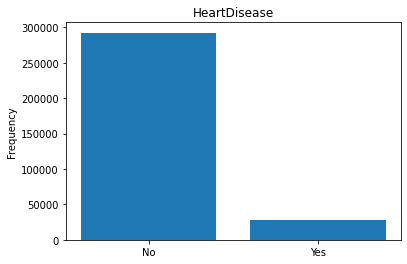

HeartDisease: 
 No     292422
Yes     27373
Name: HeartDisease, dtype: int64


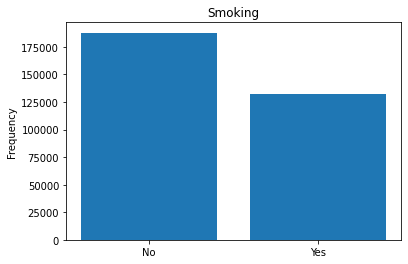

Smoking: 
 No     187887
Yes    131908
Name: Smoking, dtype: int64


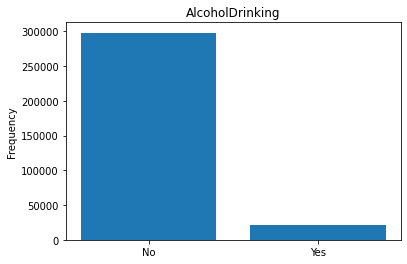

AlcoholDrinking: 
 No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64


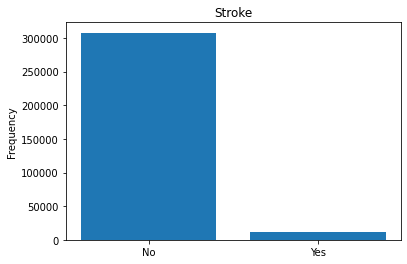

Stroke: 
 No     307726
Yes     12069
Name: Stroke, dtype: int64


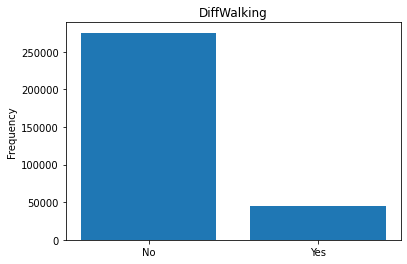

DiffWalking: 
 No     275385
Yes     44410
Name: DiffWalking, dtype: int64


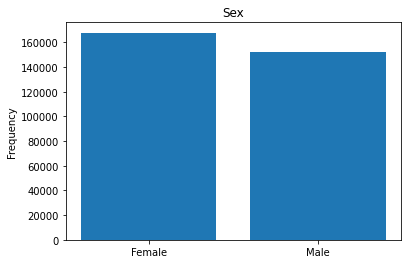

Sex: 
 Female    167805
Male      151990
Name: Sex, dtype: int64


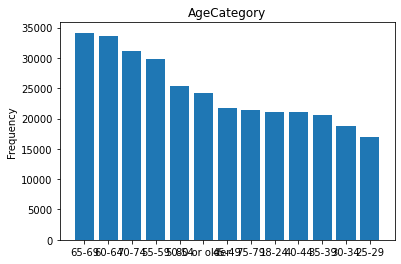

AgeCategory: 
 65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64


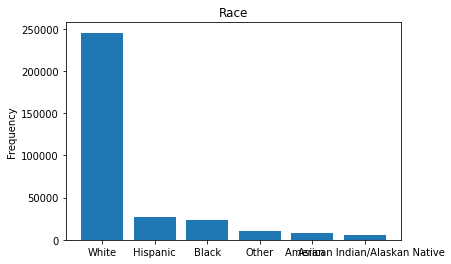

Race: 
 White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64


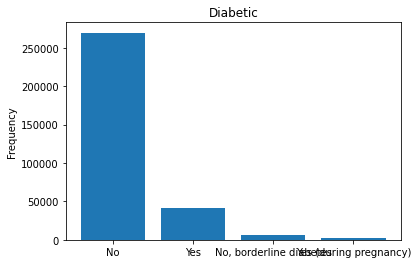

Diabetic: 
 No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64


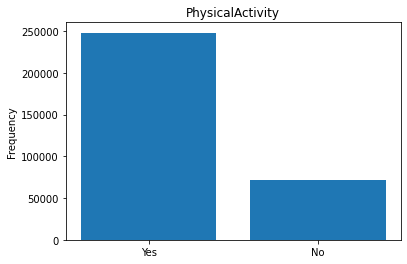

PhysicalActivity: 
 Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64


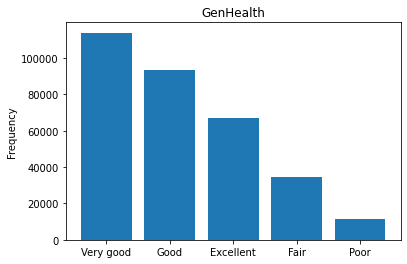

GenHealth: 
 Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64


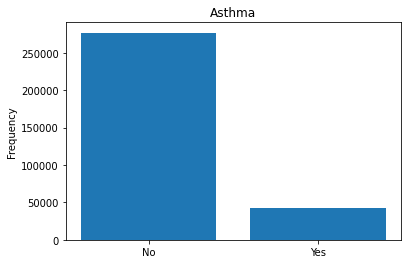

Asthma: 
 No     276923
Yes     42872
Name: Asthma, dtype: int64


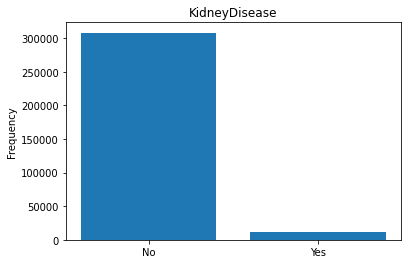

KidneyDisease: 
 No     308016
Yes     11779
Name: KidneyDisease, dtype: int64


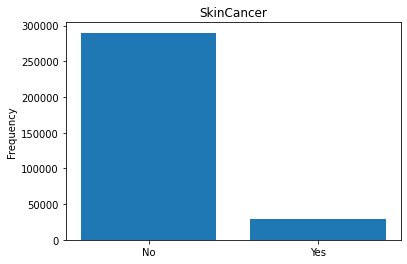

SkinCancer: 
 No     289976
Yes     29819
Name: SkinCancer, dtype: int64


In [30]:
def frequencies(variable):
    """
            input: variable Ex:"GenHealth","AgeCategory" ...
            output: Bar plot & value count
    
    
    """
    # Get columns
    var=df_cat[variable]
    # Frequencies of categorical variables
    varValue=var.value_counts()
    #Visualization
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    
    
for i in df_cat:
    frequencies(i)

<a id="8"></a>

<font color='DeepSkyBlue'>


## Numerical Variables

#### To see only numerical variables:

In [31]:
df_num=df.select_dtypes(include=["float64"])
df_num.head(10)

BMI  PhysicalHealth  MentalHealth  SleepTime
0  16.60             3.0          30.0        5.0
1  20.34             0.0           0.0        7.0
2  26.58            20.0          30.0        8.0
3  24.21             0.0           0.0        6.0
4  23.71            28.0           0.0        8.0
5  28.87             6.0           0.0       12.0
6  21.63            15.0           0.0        4.0
7  31.64             5.0           0.0        9.0
8  26.45             0.0           0.0        5.0
9  40.69             0.0           0.0       10.0

In [32]:
df_num.describe().T

count       mean       std    min    25%    50%    75%  \
BMI             319795.0  28.325399  6.356100  12.02  24.03  27.34  31.42   
PhysicalHealth  319795.0   3.371710  7.950850   0.00   0.00   0.00   2.00   
MentalHealth    319795.0   3.898366  7.955235   0.00   0.00   0.00   3.00   
SleepTime       319795.0   7.097075  1.436007   1.00   6.00   7.00   8.00   

                  max  
BMI             94.85  
PhysicalHealth  30.00  
MentalHealth    30.00  
SleepTime       24.00

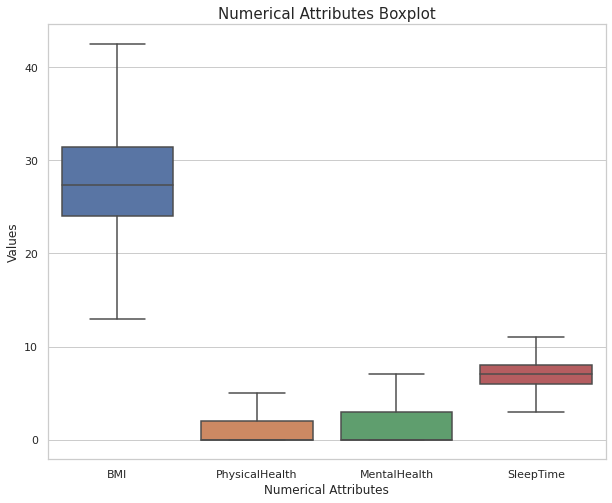

In [33]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_num, showfliers=False)  
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

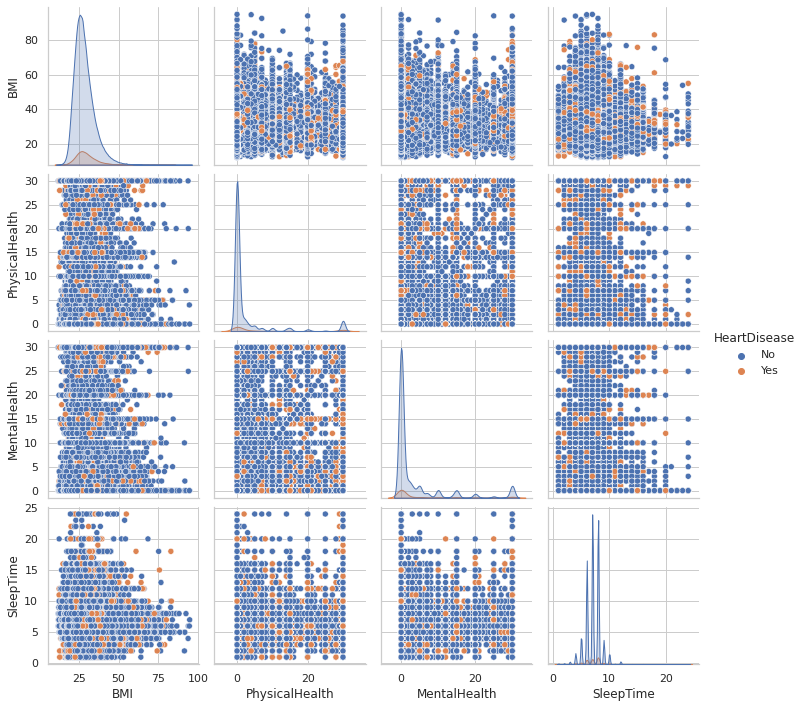

In [34]:
df_numerical = df_num.join(df['HeartDisease'])
sns.pairplot(df_numerical,hue="HeartDisease");

 ## [BACK CONTENT](#34)

<a id="9"></a>

<font color='violet'>


# BASIC DATA ANALYSIS

<a id="10"></a>

<font color='DeepSkyBlue'>


## Converting to Ordinal Variable

In [35]:
from pandas.api.types import CategoricalDtype

In [36]:
df.GenHealth.head()

0    Very good
1    Very good
2         Fair
3         Good
4    Very good
Name: GenHealth, dtype: object

In [37]:
# We order the feature GenHealth variables
df.GenHealth=df.GenHealth.astype(CategoricalDtype(ordered=True))

In [38]:
df.GenHealth.dtypes

CategoricalDtype(categories=['Excellent', 'Fair', 'Good', 'Poor', 'Very good'], ordered=True)

In [39]:
df.GenHealth.head(1)

0    Very good
Name: GenHealth, dtype: category
Categories (5, object): ['Excellent' < 'Fair' < 'Good' < 'Poor' < 'Very good']

This order is not suitable for our dataset

In [40]:
# Lets create a list which include correct order:
GenHealth_category=["Poor","Fair","Good","Very good","Excellent"]

In [41]:
df.GenHealth=df.GenHealth.astype(CategoricalDtype(ordered=True,categories=GenHealth_category))

In [42]:
df.GenHealth.head(1)
# Now its correct

0    Very good
Name: GenHealth, dtype: category
Categories (5, object): ['Poor' < 'Fair' < 'Good' < 'Very good' < 'Excellent']

<a id="11"></a>

<font color='DeepSkyBlue'>


## HeartDisease-BMI

In [43]:
df[["HeartDisease","BMI"]].groupby(["HeartDisease"],as_index=False).mean().sort_values(by="HeartDisease",ascending=False)

HeartDisease        BMI
1          Yes  29.401592
0           No  28.224658

<a id="12"></a>

<font color='DeepSkyBlue'>


## HeartDisease-SleepTime

In [44]:
df[["HeartDisease","SleepTime"]].groupby(["HeartDisease"],as_index=False).mean().sort_values(by="HeartDisease",ascending=False)

HeartDisease  SleepTime
1          Yes   7.136156
0           No   7.093416

<a id="13"></a>

<font color='DeepSkyBlue'>


## Sex-MentalHealth

In [45]:
df[["Sex","MentalHealth"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Sex",ascending=False)

Sex  MentalHealth
1    Male      3.061991
0  Female      4.655916

<a id="14"></a>

<font color='DeepSkyBlue'>


## AgeCategory-MentalHealth

In [46]:
df[["AgeCategory","MentalHealth"]].groupby(["AgeCategory"],as_index=False).mean().sort_values(by="AgeCategory",ascending=False)

AgeCategory  MentalHealth
12  80 or older      1.902290
11        75-79      2.280328
10        70-74      2.562562
9         65-69      2.887587
8         60-64      3.550555
7         55-59      4.055953
6         50-54      4.321763
5         45-49      4.385710
4         40-44      4.675188
3         35-39      5.049781
2         30-34      5.292540
1         25-29      5.729106
0         18-24      6.152535


<font color='DeepSkyBlue'>


## Heart Diesase Ratio

In [47]:
heartDisease="HeartDisease"

In [48]:
from sklearn.model_selection import train_test_split

def heartDiseaseRatio(df,y_col,test_size):
    x_cols=[k for k in df.columns if k!=y_col]
    train_x,test_x,train_y,test_y=train_test_split(df[x_cols],
                                                   df[[y_col]],
                                                   stratify=df[[y_col]],
                                                  random_state=0,
                                                  test_size=test_size)
    train_x[y_col]=train_y
    test_x[y_col]=test_y
    return train_x.reset_index(drop=True),test_x.reset_index(drop=True)
train_df,test_df=heartDiseaseRatio(df,heartDisease,0.3)
base_ratio=len(train_df[train_df[heartDisease]=="Yes"])/len(train_df)
print(f"{heartDisease} value : {', '.join(train_df[heartDisease].unique())}")
print(f"{heartDisease}=Yes Ratio: {base_ratio: .3f}")

HeartDisease value : No, Yes
HeartDisease=Yes Ratio:  0.086


 ## [BACK CONTENT](#34)

<a id="15"></a>

<font color='violet'>


# OUTLIER DETECTION

<font color='purple'>

#### What is Outlier Value?
<font color='black'>

###### Outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.

In [49]:
df_num.head()

BMI  PhysicalHealth  MentalHealth  SleepTime
0  16.60             3.0          30.0        5.0
1  20.34             0.0           0.0        7.0
2  26.58            20.0          30.0        8.0
3  24.21             0.0           0.0        6.0
4  23.71            28.0           0.0        8.0

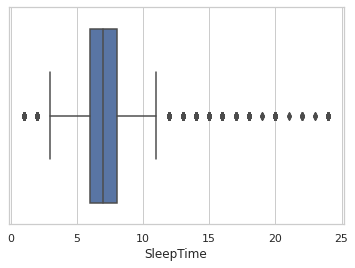

In [50]:
df_num_sleepTime=df_num["SleepTime"]
sns.boxplot(x=df_num_sleepTime);

<a id="16"></a>

<font color='DeepSkyBlue'>


## Calculation of Interquartile Range

<font color='purple'>

#### First Quertile:
<font color='black'>

###### The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set.

<font color='purple'>

#### Third Quertile:
    
    
<font color='black'>
    
###### The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set.
    
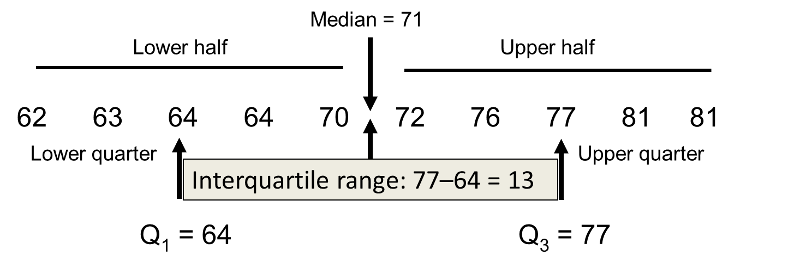!

In [51]:
Q1=df_num_sleepTime.quantile(0.25)
Q3=df_num_sleepTime.quantile(0.75)
IQR=Q3-Q1
print("First Quartile: ",Q1)
print("Third Quartile: ",Q3)
print("Interquartile: ",IQR)

First Quartile:  6.0
Third Quartile:  8.0
Interquartile:  2.0


Lets define lower and upper limits

<a id="17"></a>

<font color='DeepSkyBlue'>


## Finding Outlier Values

In [52]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print("Lower Limit: ",lower_limit)
print("Upper Limi: ",upper_limit)

Lower Limit:  3.0
Upper Limi:  11.0


In [53]:
((df_num_sleepTime<lower_limit) | (df_num_sleepTime>upper_limit))

0         False
1         False
2         False
3         False
4         False
          ...  
319790    False
319791    False
319792    False
319793     True
319794    False
Name: SleepTime, Length: 319795, dtype: bool

In [54]:
outlier_TF=(df_num_sleepTime<lower_limit)
outlier_TF.head()

0    False
1    False
2    False
3    False
4    False
Name: SleepTime, dtype: bool

In [55]:
df_num_sleepTime[outlier_TF]

235       2.0
250       2.0
288       2.0
560       2.0
581       1.0
         ... 
319229    1.0
319290    1.0
319373    2.0
319394    2.0
319408    1.0
Name: SleepTime, Length: 1339, dtype: float64

In [56]:
df_num_sleepTime[outlier_TF].index

Int64Index([   235,    250,    288,    560,    581,    896,   1702,   2856,
              2858,   3267,
            ...
            316846, 317100, 318026, 318371, 318737, 319229, 319290, 319373,
            319394, 319408],
           dtype='int64', length=1339)

<a id="18"></a>

<font color='DeepSkyBlue'>


# Solutions for Outlier Values
    
<font color='DarkTurquoise'>


* Trimming
* Imputation
* Winsorization

<a id="19"></a>

<font color='DarkTurquoise'>


## TRIMMING

In [57]:
type(df_num_sleepTime)

pandas.core.series.Series

In [58]:
df_num_sleepTime=pd.DataFrame(df_num_sleepTime)

In [59]:
df_num_sleepTime.shape

(319795, 1)

In [60]:
sleepTime_df=df_num_sleepTime[~((df_num_sleepTime<(lower_limit)) | (df_num_sleepTime>(upper_limit))).any(axis=1)]
sleepTime_df

SleepTime
0             5.0
1             7.0
2             8.0
3             6.0
4             8.0
...           ...
319789        8.0
319790        6.0
319791        5.0
319792        6.0
319794        8.0

[315252 rows x 1 columns]

<a id="20"></a>

<font color='DarkTurquoise'>


## IMPUTATION

In [61]:
data=pd.read_csv("../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")
df=data.copy()
df_num=df.select_dtypes(include=["float64"])

In [62]:
df_num_sleepTime=df_num["SleepTime"]

In [63]:
outlier_TF.head()

0    False
1    False
2    False
3    False
4    False
Name: SleepTime, dtype: bool

In [64]:
df_num_sleepTime[outlier_TF]

235       2.0
250       2.0
288       2.0
560       2.0
581       1.0
         ... 
319229    1.0
319290    1.0
319373    2.0
319394    2.0
319408    1.0
Name: SleepTime, Length: 1339, dtype: float64

In [65]:
df_num_sleepTime.mean()

7.097074688472302

In [66]:
df_num_sleepTime[outlier_TF]=df_num_sleepTime.mean()

In [67]:
df_num_sleepTime[outlier_TF]

235       7.097075
250       7.097075
288       7.097075
560       7.097075
581       7.097075
            ...   
319229    7.097075
319290    7.097075
319373    7.097075
319394    7.097075
319408    7.097075
Name: SleepTime, Length: 1339, dtype: float64

<a id="21"></a>

<font color='DarkTurquoise'>


## WINSORIZATION

In [68]:
data=pd.read_csv("../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")
df=data.copy()
df_num=df.select_dtypes(include=["float64"])

In [69]:
df_num_sleepTime=df_num["SleepTime"]
outlier_TF.head()

0    False
1    False
2    False
3    False
4    False
Name: SleepTime, dtype: bool

In [70]:
df_num_sleepTime[outlier_TF]=lower_limit

In [71]:
df_num_sleepTime[outlier_TF]

235       3.0
250       3.0
288       3.0
560       3.0
581       3.0
         ... 
319229    3.0
319290    3.0
319373    3.0
319394    3.0
319408    3.0
Name: SleepTime, Length: 1339, dtype: float64

 ## [BACK CONTENT](#34)

<a id="22"></a>

<font color='violet'>


# VISUALIZATION

In [72]:
df_num.head(1)

BMI  PhysicalHealth  MentalHealth  SleepTime
0  16.6             3.0          30.0        5.0

<a id="23"></a>

<font color='DeepSkyBlue'>


## Correlation Between BMI-PhysicalHealth-MentalHealth-SleepTime

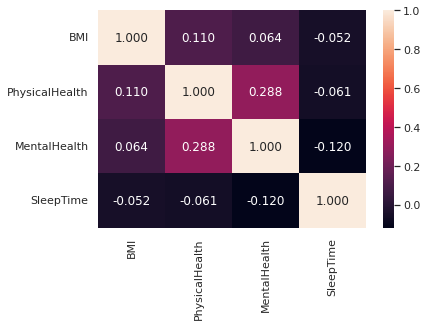

In [73]:
corr_list=["BMI","PhysicalHealth","MentalHealth","SleepTime"]
sns.heatmap(df[corr_list].corr(),annot=True,fmt=".3f");

<a id="24"></a>

<font color='DeepSkyBlue'>


## AGE

In [74]:
# Prepare Data:
age_category={
    "18-24":18,"25-29":25,"30-34":30,"35-39":35,"40-44":40, 
    "45-49":45,"50-54":50,"55-59":55,"60-64":60,"65-69":65,
    "70-74":70,"75-79":75,"80 or older":80
}

temp=train_df[[heartDisease,"Sex","AgeCategory","Race"]]
temp["AgeCategory"]=temp["AgeCategory"].apply(lambda x : age_category[x])
tempAge=temp[temp[heartDisease]=="Yes"].groupby(["AgeCategory"])[[heartDisease]].count().rename(columns={heartDisease:f"{heartDisease}_count"})
tempAge["total_count"]=temp.groupby(["AgeCategory"])[[heartDisease]].count()
tempAge[f'{heartDisease}_ratio'] = tempAge[f'{heartDisease}_count'] / tempAge['total_count']
tempAge[f'{heartDisease}_cumratio_total'] = tempAge[f'{heartDisease}_count'].cumsum() / tempAge['total_count'].cumsum()
tempAge[f'{heartDisease}_cumratio_yes'] = tempAge[f'{heartDisease}_count'].cumsum() / len(temp[temp[heartDisease]=='Yes'])

In [75]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()

In [76]:
fig=make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=tempAge.index,y=tempAge[f"{heartDisease}_count"],line=dict(color="purple"),name="The number of Heart Disease by Age"),secondary_y=False)
fig.add_trace(go.Scatter(x=tempAge.index,y=tempAge["total_count"],line=dict(color="cyan"),name="The number of People by Age"),secondary_y=False)
fig.update_layout(title='<b>THE NUMBER of HEART DISEASE by AGE</b>', template="simple_white")
fig.update_layout(legend=dict(x=0, y=1.4), margin=dict(l=20, r=20, t=200, b=70))
fig.update_yaxes(title="Count", rangemode="tozero", secondary_y=False)
fig.update_xaxes(title="AgeCategory")
fig.show()

In [77]:
fig=make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Bar(x=tempAge.index,y=tempAge[f"{heartDisease}_ratio"],marker=dict(color=["lightcoral"]*9+["darkred"]*10),name="The Ratio of Heart Disease in Age"),secondary_y=False)
fig.add_trace(go.Scatter(x=tempAge.index, y=tempAge[f'{heartDisease}_cumratio_yes'],line=dict(color="black") ,name='The Cumulative Sum of Ratio of Heart Diseas by Age'),secondary_y=True)
fig.update_layout(title='<b>THE PERCENTAGE of HEART DISEASE by AGE</b>', template="simple_white")
fig.update_layout(legend=dict(x=0, y=1.4), margin=dict(l=20, r=20, t=200, b=70))
fig.update_yaxes(title="Ratio", rangemode="tozero", secondary_y=False)
fig.update_yaxes(title="Cumulative Sum of Ratio", rangemode="tozero", secondary_y=True)
fig.update_xaxes(title="AgeCategory")
fig.show()

<a id="25"></a>

<font color='DeepSkyBlue'>


## BMI

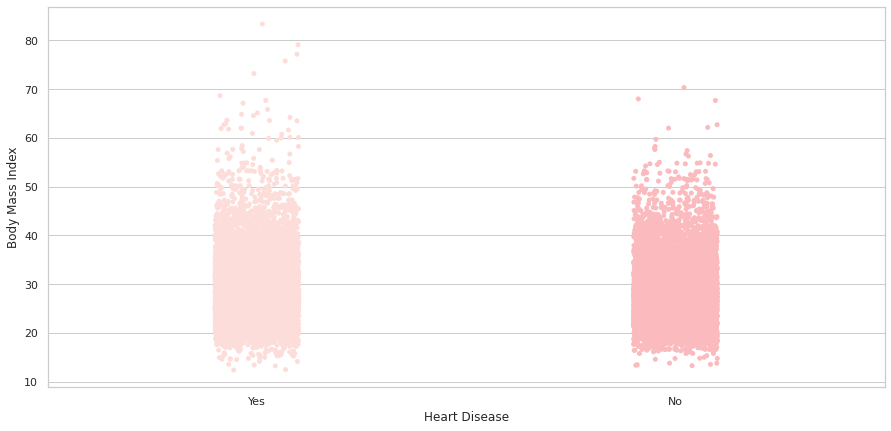

In [78]:
# Prepare Data:
hd_yes=df[df["HeartDisease"]=="Yes"].sample(n=10000,random_state=42)
hd_no=df[df["HeartDisease"]=="No"].sample(n=10000,random_state=42)
sample=pd.concat([hd_yes,hd_no])
# VISUALIZE:

sns.set_palette("RdPu")
plt.figure(figsize=(15,7))
sns.stripplot(data=sample,x="HeartDisease",y="BMI")
plt.xlabel("Heart Disease")
plt.ylabel("Body Mass Index")
plt.show()

<a id="26"></a>

<font color='DeepSkyBlue'>

   

## SMOKING

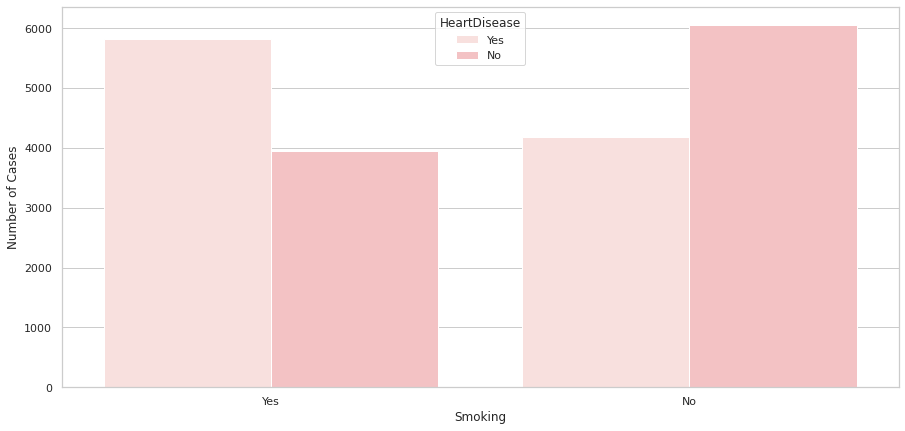

In [79]:
sns.set_palette("RdPu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="Smoking",hue="HeartDisease")
plt.xlabel("Smoking")
plt.ylabel("Number of Cases")
plt.show()

<a id="27"></a>

<font color='DeepSkyBlue'>


## ALCOHOL

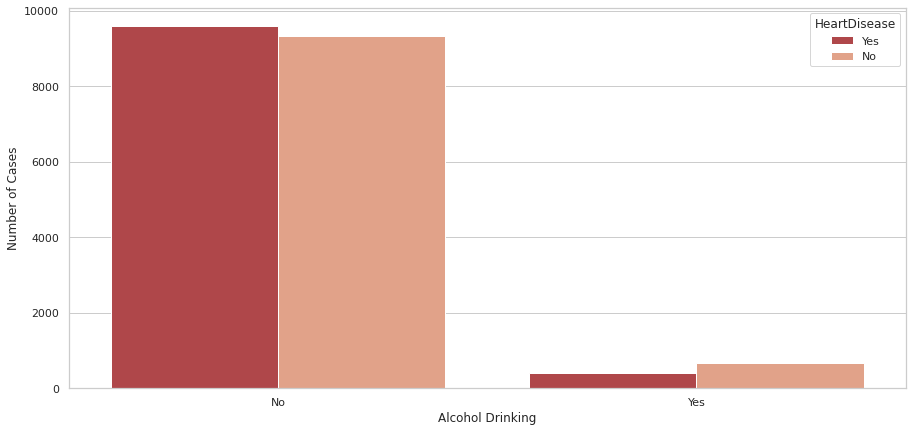

In [80]:
sns.set_palette("RdBu")
plt.figure(figsize=(15,7))
sns.countplot(data=sample,x="AlcoholDrinking",hue="HeartDisease")
plt.xlabel("Alcohol Drinking")
plt.ylabel("Number of Cases")
plt.show()

 ## [BACK CONTENT](#34)

<a id="28"></a>

<font color='violet'>


# MODELLING

In [81]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

<a id="29"></a>

<font color='DeepSkyBlue'>


## PREPROCESSING

In [82]:
df["id"]=range(1,319796)
df=df.set_index("id")

In [83]:
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
id                                                                          
1                No  16.60     Yes              No     No             3.0   
2                No  20.34      No              No    Yes             0.0   
3                No  26.58     Yes              No     No            20.0   
4                No  24.21      No              No     No             0.0   
5                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319791          Yes  27.41     Yes              No     No             7.0   
319792           No  29.84     Yes              No     No             0.0   
319793           No  24.24      No              No     No             0.0   
319794           No  32.81      No              No     No             0.0   
319795           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
id                                                                         
1               30.0          No  Female        55-59     White      Yes   
2                0.0          No  Female  80 or older     White       No   
3               30.0          No    Male        65-69     White      Yes   
4                0.0          No  Female        75-79     White       No   
5                0.0         Yes  Female        40-44     White       No   
...              ...         ...     ...          ...       ...      ...   
319791           0.0         Yes    Male        60-64  Hispanic      Yes   
319792           0.0          No    Male        35-39  Hispanic       No   
319793           0.0          No  Female        45-49  Hispanic       No   
319794           0.0          No  Female        25-29  Hispanic       No   
319795           0.0          No  Female  80 or older  Hispanic       No   

       PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
id                                                                             
1                   Yes  Very good        5.0    Yes            No        Yes  
2                   Yes  Very good        7.0     No            No         No  
3                   Yes       Fair        8.0    Yes            No         No  
4                    No       Good        6.0     No            No        Yes  
5                   Yes  Very good        8.0     No            No         No  
...                 ...        ...        ...    ...           ...        ...  
319791               No       Fair        6.0    Yes            No         No  
319792              Yes  Very good        5.0    Yes            No         No  
319793              Yes       Good        6.0     No            No         No  
319794               No       Good       12.0     No            No         No  
319795              Yes       Good        8.0     No            No         No  

[319795 rows x 18 columns]

In [84]:
df_categorical=df_cat.columns
df_categorical

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [85]:
for var in df_categorical:
    Dummy=pd.get_dummies(df[var]).add_prefix(var)
    df=df.merge(Dummy,on="id")
    df=df.drop([var],axis=1)

In [86]:
df.head(5)

BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDiseaseNo  \
id                                                                   
1   16.60             3.0          30.0        5.0               1   
2   20.34             0.0           0.0        7.0               1   
3   26.58            20.0          30.0        8.0               1   
4   24.21             0.0           0.0        6.0               1   
5   23.71            28.0           0.0        8.0               1   

    HeartDiseaseYes  SmokingNo  SmokingYes  AlcoholDrinkingNo  \
id                                                              
1                 0          0           1                  1   
2                 0          1           0                  1   
3                 0          0           1                  1   
4                 0          1           0                  1   
5                 0          1           0                  1   

    AlcoholDrinkingYes  ...  GenHealthFair  GenHealthGood  GenHealthPoor  \
id                      ...                                                
1                    0  ...              0              0              0   
2                    0  ...              0              0              0   
3                    0  ...              1              0              0   
4                    0  ...              0              1              0   
5                    0  ...              0              0              0   

    GenHealthVery good  AsthmaNo  AsthmaYes  KidneyDiseaseNo  \
id                                                             
1                    1         0          1                1   
2                    1         1          0                1   
3                    0         0          1                1   
4                    0         1          0                1   
5                    1         1          0                1   

    KidneyDiseaseYes  SkinCancerNo  SkinCancerYes  
id                                                 
1                  0             0              1  
2                  0             1              0  
3                  0             1              0  
4                  0             0              1  
5                  0             1              0  

[5 rows x 52 columns]

In [87]:
y=df.HeartDiseaseYes

In [88]:
df.describe().T

count       mean       std    min  \
BMI                                 319795.0  28.325399  6.356100  12.02   
PhysicalHealth                      319795.0   3.371710  7.950850   0.00   
MentalHealth                        319795.0   3.898366  7.955235   0.00   
SleepTime                           319795.0   7.097075  1.436007   1.00   
HeartDiseaseNo                      319795.0   0.914405  0.279766   0.00   
HeartDiseaseYes                     319795.0   0.085595  0.279766   0.00   
SmokingNo                           319795.0   0.587523  0.492281   0.00   
SmokingYes                          319795.0   0.412477  0.492281   0.00   
AlcoholDrinkingNo                   319795.0   0.931903  0.251912   0.00   
AlcoholDrinkingYes                  319795.0   0.068097  0.251912   0.00   
StrokeNo                            319795.0   0.962260  0.190567   0.00   
StrokeYes                           319795.0   0.037740  0.190567   0.00   
DiffWalkingNo                       319795.0   0.861130  0.345812   0.00   
DiffWalkingYes                      319795.0   0.138870  0.345812   0.00   
SexFemale                           319795.0   0.524727  0.499389   0.00   
SexMale                             319795.0   0.475273  0.499389   0.00   
AgeCategory18-24                    319795.0   0.065867  0.248050   0.00   
AgeCategory25-29                    319795.0   0.053018  0.224070   0.00   
AgeCategory30-34                    319795.0   0.058641  0.234951   0.00   
AgeCategory35-39                    319795.0   0.064260  0.245216   0.00   
AgeCategory40-44                    319795.0   0.065686  0.247733   0.00   
AgeCategory45-49                    319795.0   0.068141  0.251987   0.00   
AgeCategory50-54                    319795.0   0.079370  0.270315   0.00   
AgeCategory55-59                    319795.0   0.093050  0.290503   0.00   
AgeCategory60-64                    319795.0   0.105336  0.306987   0.00   
AgeCategory65-69                    319795.0   0.106790  0.308847   0.00   
AgeCategory70-74                    319795.0   0.097140  0.296149   0.00   
AgeCategory75-79                    319795.0   0.067174  0.250324   0.00   
AgeCategory80 or older              319795.0   0.075527  0.264239   0.00   
RaceAmerican Indian/Alaskan Native  319795.0   0.016267  0.126499   0.00   
RaceAsian                           319795.0   0.025229  0.156819   0.00   
RaceBlack                           319795.0   0.071730  0.258041   0.00   
RaceHispanic                        319795.0   0.085824  0.280104   0.00   
RaceOther                           319795.0   0.034172  0.181671   0.00   
RaceWhite                           319795.0   0.766779  0.422883   0.00   
DiabeticNo                          319795.0   0.843206  0.363607   0.00   
DiabeticNo, borderline diabetes     319795.0   0.021204  0.144065   0.00   
DiabeticYes                         319795.0   0.127588  0.333631   0.00   
DiabeticYes (during pregnancy)      319795.0   0.008002  0.089095   0.00   
PhysicalActivityNo                  319795.0   0.224638  0.417344   0.00   
PhysicalActivityYes                 319795.0   0.775362  0.417344   0.00   
GenHealthExcellent                  319795.0   0.209015  0.406606   0.00   
GenHealthFair                       319795.0   0.108435  0.310930   0.00   
GenHealthGood                       319795.0   0.291215  0.454323   0.00   
GenHealthPoor                       319795.0   0.035301  0.184539   0.00   
GenHealthVery good                  319795.0   0.356034  0.478826   0.00   
AsthmaNo                            319795.0   0.865939  0.340718   0.00   
AsthmaYes                           319795.0   0.134061  0.340718   0.00   
KidneyDiseaseNo                     319795.0   0.963167  0.188352   0.00   
KidneyDiseaseYes                    319795.0   0.036833  0.188352   0.00   
SkinCancerNo                        319795.0   0.906756  0.290775   0.00   
SkinCancerYes                       319795.0   0.093244  0.290775   0.00   

          

In [89]:
train=df.drop(["HeartDiseaseYes","HeartDiseaseNo"],axis=1)

In [90]:
train.head(5)

BMI  PhysicalHealth  MentalHealth  SleepTime  SmokingNo  SmokingYes  \
id                                                                          
1   16.60             3.0          30.0        5.0          0           1   
2   20.34             0.0           0.0        7.0          1           0   
3   26.58            20.0          30.0        8.0          0           1   
4   24.21             0.0           0.0        6.0          1           0   
5   23.71            28.0           0.0        8.0          1           0   

    AlcoholDrinkingNo  AlcoholDrinkingYes  StrokeNo  StrokeYes  ...  \
id                                                              ...   
1                   1                   0         1          0  ...   
2                   1                   0         0          1  ...   
3                   1                   0         1          0  ...   
4                   1                   0         1          0  ...   
5                   1                   0         1          0  ...   

    GenHealthFair  GenHealthGood  GenHealthPoor  GenHealthVery good  AsthmaNo  \
id                                                                              
1               0              0              0                   1         0   
2               0              0              0                   1         1   
3               1              0              0                   0         0   
4               0              1              0                   0         1   
5               0              0              0                   1         1   

    AsthmaYes  KidneyDiseaseNo  KidneyDiseaseYes  SkinCancerNo  SkinCancerYes  
id                                                                             
1           1                1                 0             0              1  
2           0                1                 0             1              0  
3           1                1                 0             1              0  
4           0                1                 0             0              1  
5           0                1                 0             1              0  

[5 rows x 50 columns]

<a id="30"></a>

<font color='DeepSkyBlue'>


## NORMALIZATION

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler=MinMaxScaler()
columns=train.columns
s=scaler.fit_transform(train)

scaled_data=pd.DataFrame(s,columns=columns)
scaled_data.head(5)

BMI  PhysicalHealth  MentalHealth  SleepTime  SmokingNo  SmokingYes  \
0  0.055294        0.100000           1.0   0.173913        0.0         1.0   
1  0.100447        0.000000           0.0   0.260870        1.0         0.0   
2  0.175782        0.666667           1.0   0.304348        0.0         1.0   
3  0.147169        0.000000           0.0   0.217391        1.0         0.0   
4  0.141132        0.933333           0.0   0.304348        1.0         0.0   

   AlcoholDrinkingNo  AlcoholDrinkingYes  StrokeNo  StrokeYes  ...  \
0                1.0                 0.0       1.0        0.0  ...   
1                1.0                 0.0       0.0        1.0  ...   
2                1.0                 0.0       1.0        0.0  ...   
3                1.0                 0.0       1.0        0.0  ...   
4                1.0                 0.0       1.0        0.0  ...   

   GenHealthFair  GenHealthGood  GenHealthPoor  GenHealthVery good  AsthmaNo  \
0            0.0            0.0            0.0                 1.0       0.0   
1            0.0            0.0            0.0                 1.0       1.0   
2            1.0            0.0            0.0                 0.0       0.0   
3            0.0            1.0            0.0                 0.0       1.0   
4            0.0            0.0            0.0                 1.0       1.0   

   AsthmaYes  KidneyDiseaseNo  KidneyDiseaseYes  SkinCancerNo  SkinCancerYes  
0        1.0              1.0               0.0           0.0            1.0  
1        0.0              1.0               0.0           1.0            0.0  
2        1.0              1.0               0.0           1.0            0.0  
3        0.0              1.0               0.0           0.0            1.0  
4        0.0              1.0               0.0           1.0            0.0  

[5 rows x 50 columns]

<a id="31"></a>

<font color='DeepSkyBlue'>


## TRAIN-TEST SPLIT

In [93]:
X_train,X_test,y_train,y_test=train_test_split(scaled_data,
                                               y,
                                               test_size=0.3,
                                               random_state=42)

<a id="32"></a>

<font color='DeepSkyBlue'>


## MODELS

In [94]:
models=[KNeighborsClassifier(),LogisticRegression(),XGBClassifier(),RandomForestClassifier()]
scores=dict()

for m in models:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    
    
    print(f'Model: {str(m)}')
    print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission Score: {precision_score(y_test,y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'F1-Score: {f1_score(y_test,y_pred)}')
    print('-'*100, '\n')
    

Model: KNeighborsClassifier()
Accuracy Score: 0.9049708669050126
Precission Score: 0.3656158596035099
Recall Score: 0.13570566948130278
F1-Score: 0.19794140934283452
---------------------------------------------------------------------------------------------------- 

Model: LogisticRegression()
Accuracy Score: 0.9144664839116522
Precission Score: 0.5265151515151515
Recall Score: 0.1006031363088058
F1-Score: 0.1689284990885153
---------------------------------------------------------------------------------------------------- 

[12:52:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
  

<a id="33"></a>

<font color='DeepSkyBlue'>


## ROC - AUC CURVE

<font color='DarkBlue'>

## RECEIVER OPERATING CHARACHTERISTIC (ROC) Curve


###### An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

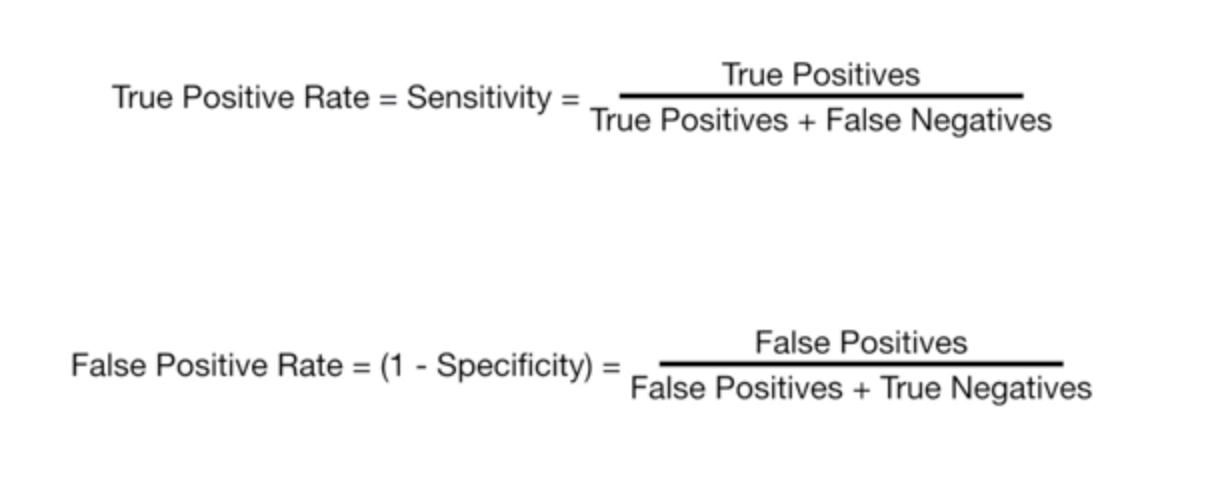

<font color='DarkBlue'>

## AUC: Area Under the ROC Curve
    
<font color='black'>
    
    
##### AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example

In [95]:
from sklearn.metrics import roc_auc_score,roc_curve

In [96]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [97]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [98]:
lr_probs=logistic_model.predict_proba(X_test)
lr_probs=lr_probs[:,1]

In [99]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

ROC AUC=0.500
Logistic: ROC AUC=0.837


In [100]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

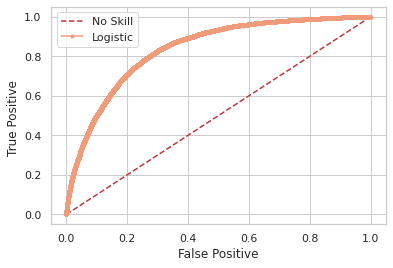

In [101]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive')
plt.ylabel('True Positive ')
plt.legend()
plt.show()

#### OR

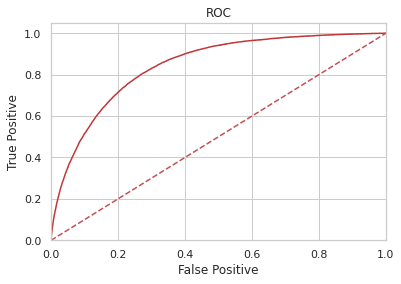

In [102]:
logistic_roc_acu=roc_auc_score(y_train,logistic.predict(X_train))
fpr,tpr,tresholds=roc_curve(y_train,logistic.predict_log_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (area=%0.2f)"%logistic_roc_acu)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC")
plt.show()

 ## [BACK CONTENT](#34)